## UMBRELLA SAMPLING

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
N_sam = 50000
burn_in = 1000
thinning = 10

delta_E = 4

#### Hamiltonian

In [3]:
def H(x, delta_E=4):
    return +x**4-delta_E*x**2 + delta_E-1

#plot of the hamiltonina
x_plot = np.linspace(-2,2,100)
plt.plot(x_plot,H(x_plot, delta_E), label='H(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('H(x)')
plt.show()

#### Observables

In [4]:
def avg_x(x_sam):
    return np.mean(x_sam)

#### Sampling with metropolis

In [5]:
def metropolis(x_old, energy, delta=0.1, T=1):

    x_new = np.random.normal(x_old, delta)

    if np.random.uniform(0,1) < np.exp(-1/T*(energy(x_new)-energy(x_old))):
        return x_new
    else:
        return x_old

In [6]:
#sampling
x0 = np.random.uniform(-2, 2)
x = [x0]

for i in range(N_sam):
    x0 = metropolis(x0, H)
    x.append(x0)

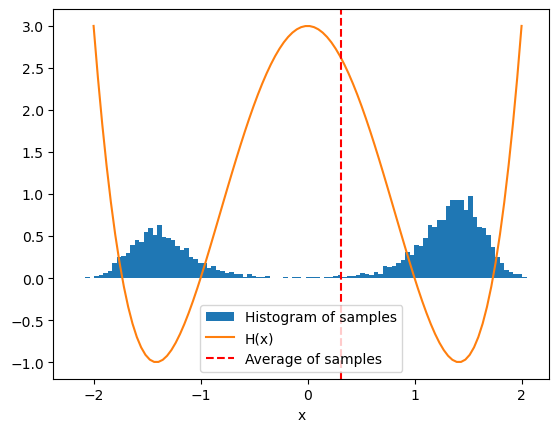

In [7]:
#analysis of sampling
x_sam = np.array(x[burn_in::thinning])

plt.figure()
plt.hist(x_sam, bins=100, density=True, label = 'Histogram of samples')
plt.xlabel('x')


plt.plot(x_plot, H(x_plot),label = 'H(x)')

plt.axvline(avg_x(x_sam), linestyle = '--', color='r', label='Average of samples')

plt.legend()

plt.savefig('plots/naive_metropolis.png')

### Umbrella sampling

In [8]:
### defining the ausiliary potential

def U(x, mean = 0, scale = 0.5, delta_E = 3.5):
    return -delta_E/np.sqrt(2*np.pi*scale**2)*np.exp(-1/2*(x-mean)**2/scale**2)

In [9]:
#plot of the hamiltonina
x_plot = np.linspace(-2,2,100)

plt.plot(x_plot,H(x_plot), label='H(x)')
plt.plot(x_plot,U(x_plot), label='U(x)')
plt.plot(x_plot,H(x_plot)+U(x_plot), label='H(x)+U(x)')

plt.legend()
plt.xlabel('x')
plt.savefig('plots/hamiltonian_and_potential.png')

#### Modifying metropolis with umbrella sampling


In [10]:
def mod_hamiltonian(x):
    return H(x)+U(x)

In [11]:
#sampling
x0 = np.random.uniform(-2, 2)
x = [x0]

for i in range(N_sam):
    x0 = metropolis(x0, mod_hamiltonian)
    x.append(x0)

In [12]:
def umbrella_pos_average(x_sam):
    num = 0
    den = 0
    for x in x_sam:
        num = num + x*np.exp(U(x))
        den = den + np.exp(U(x))
    return num/den

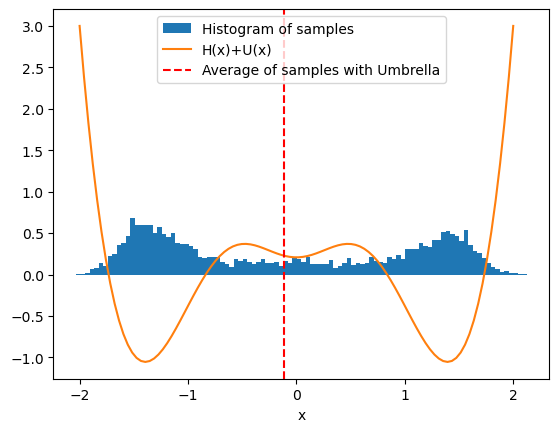

In [14]:
#analysis of sampling
x_sam = np.array(x[burn_in::thinning])

plt.figure()
plt.hist(x_sam, bins=100, density=True, label = 'Histogram of samples')
plt.xlabel('x')


plt.plot(x_plot, H(x_plot)+ U(x_plot), label = 'H(x)+U(x)')

plt.axvline(umbrella_pos_average(x_sam), linestyle = '--', color='r', label='Average of samples with Umbrella')

plt.legend()

plt.savefig('plots/umbrella_metropolis.png')